In [26]:
import pandas as pd
import seaborn as sns
import math
from matplotlib import pyplot as plt

# show all columns of df
pd.set_option('display.max_columns', None)

In [4]:
# Constants
file = "../data/dataset_phishing.csv"

In [6]:
#Read data
df = pd.read_csv(file)
df.shape

(11430, 89)

In [7]:
#subset data
subset_df = df.iloc[:,68:88]
response = df.iloc[:,-1]

In [8]:
subset_df.head()

links_in_tags  submit_email  ratio_intMedia  ratio_extMedia  sfh  iframe  \
0      80.000000             0      100.000000        0.000000    0       0   
1     100.000000             0       80.000000       20.000000    0       0   
2     100.000000             0        0.000000        0.000000    0       0   
3     100.000000             0       96.428571        3.571429    0       0   
4      76.470588             0        0.000000      100.000000    0       0   

   popup_window  safe_anchor  onmouseover  right_clic  empty_title  \
0             0          0.0            0           0            0   
1             0        100.0            0           0            0   
2             0        100.0            0           0            0   
3             0         62.5            0           0            0   
4             0          0.0            0           0            0   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                      1                        0   
1                1                      0                        0   
2                1                      0                        0   
3                1                      0                        0   
4                0                      1                        0   

   domain_registration_length  domain_age  web_traffic  dns_record  \
0                          45          -1            0           1   
1                          77        5767            0           0   
2                          14        4004      5828815           0   
3                          62          -1       107721           0   
4                         224        8175         8725           0   

   google_index  page_rank  
0             1          4  
1             1          2  
2             1          0  
3             0          3  
4             0          6

In [13]:
subset_df.dtypes

links_in_tags                 float64
submit_email                    int64
ratio_intMedia                float64
ratio_extMedia                float64
sfh                             int64
iframe                          int64
popup_window                    int64
safe_anchor                   float64
onmouseover                     int64
right_clic                      int64
empty_title                     int64
domain_in_title                 int64
domain_with_copyright           int64
whois_registered_domain         int64
domain_registration_length      int64
domain_age                      int64
web_traffic                     int64
dns_record                      int64
google_index                    int64
page_rank                       int64
dtype: object

All numerical data

In [14]:
subset_df.isna().sum()

links_in_tags                 0
submit_email                  0
ratio_intMedia                0
ratio_extMedia                0
sfh                           0
iframe                        0
popup_window                  0
safe_anchor                   0
onmouseover                   0
right_clic                    0
empty_title                   0
domain_in_title               0
domain_with_copyright         0
whois_registered_domain       0
domain_registration_length    0
domain_age                    0
web_traffic                   0
dns_record                    0
google_index                  0
page_rank                     0
dtype: int64

No missing vals

In [41]:
subset_df.nunique()

links_in_tags                  473
submit_email                     1
ratio_intMedia                 490
ratio_extMedia                 490
sfh                              1
iframe                           2
popup_window                     2
safe_anchor                   1083
onmouseover                      2
right_clic                       2
empty_title                      2
domain_in_title                  2
domain_with_copyright            2
whois_registered_domain          2
domain_registration_length    1659
domain_age                    4430
web_traffic                   4744
dns_record                       2
google_index                     2
page_rank                       11
dtype: int64

'submit_email' and 'sfh' cols are all 0s and provide no additional data. Going to drop from further analysis.

In [42]:
subset_df.drop(columns=['submit_email','sfh'],inplace=True)

### Distribution of Response Var

<AxesSubplot: >

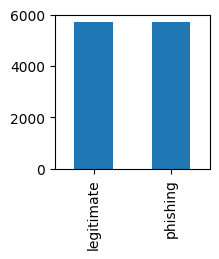

In [19]:
response.value_counts().plot.bar(figsize=(2,2))

Balanced response var

### Distribution of other vars

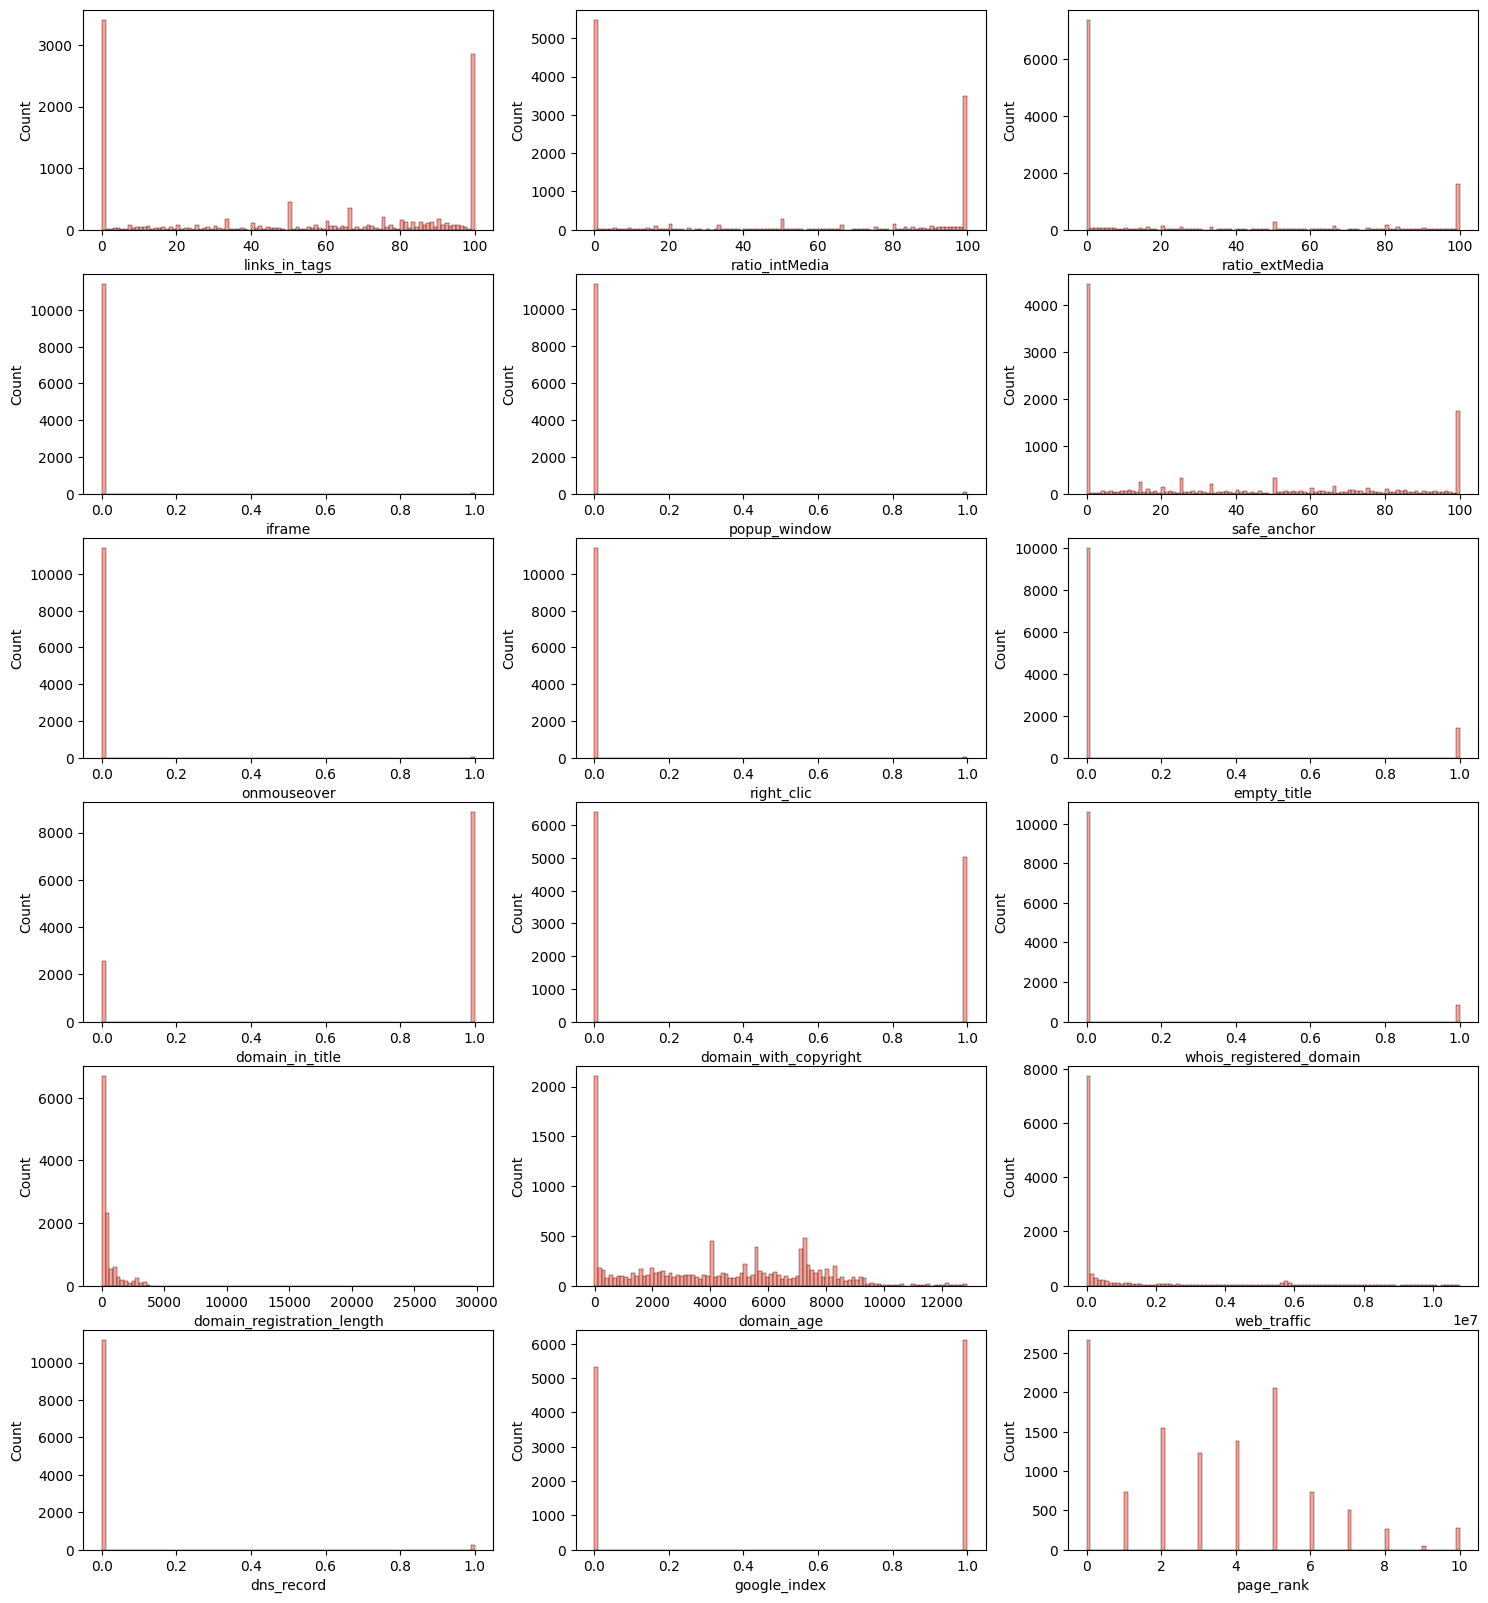

In [44]:
fig,axs = plt.subplots(ncols = 3, nrows = int(subset_df.shape[1]/3), figsize = (18, 20))
var = 0 #col var

for row in range(0,int(subset_df.shape[1]/3)):
    for col in range(0,3):
        sns.histplot(data = subset_df, x = subset_df.iloc[:,var], ax = axs[row, col], color = "salmon", bins = 100)
        var+=1

plt.show()

A lot of binary variables heavily imbalanced. Remaining numerical variables are heavily right skewed except for page_rank

### Correlations

<AxesSubplot: >

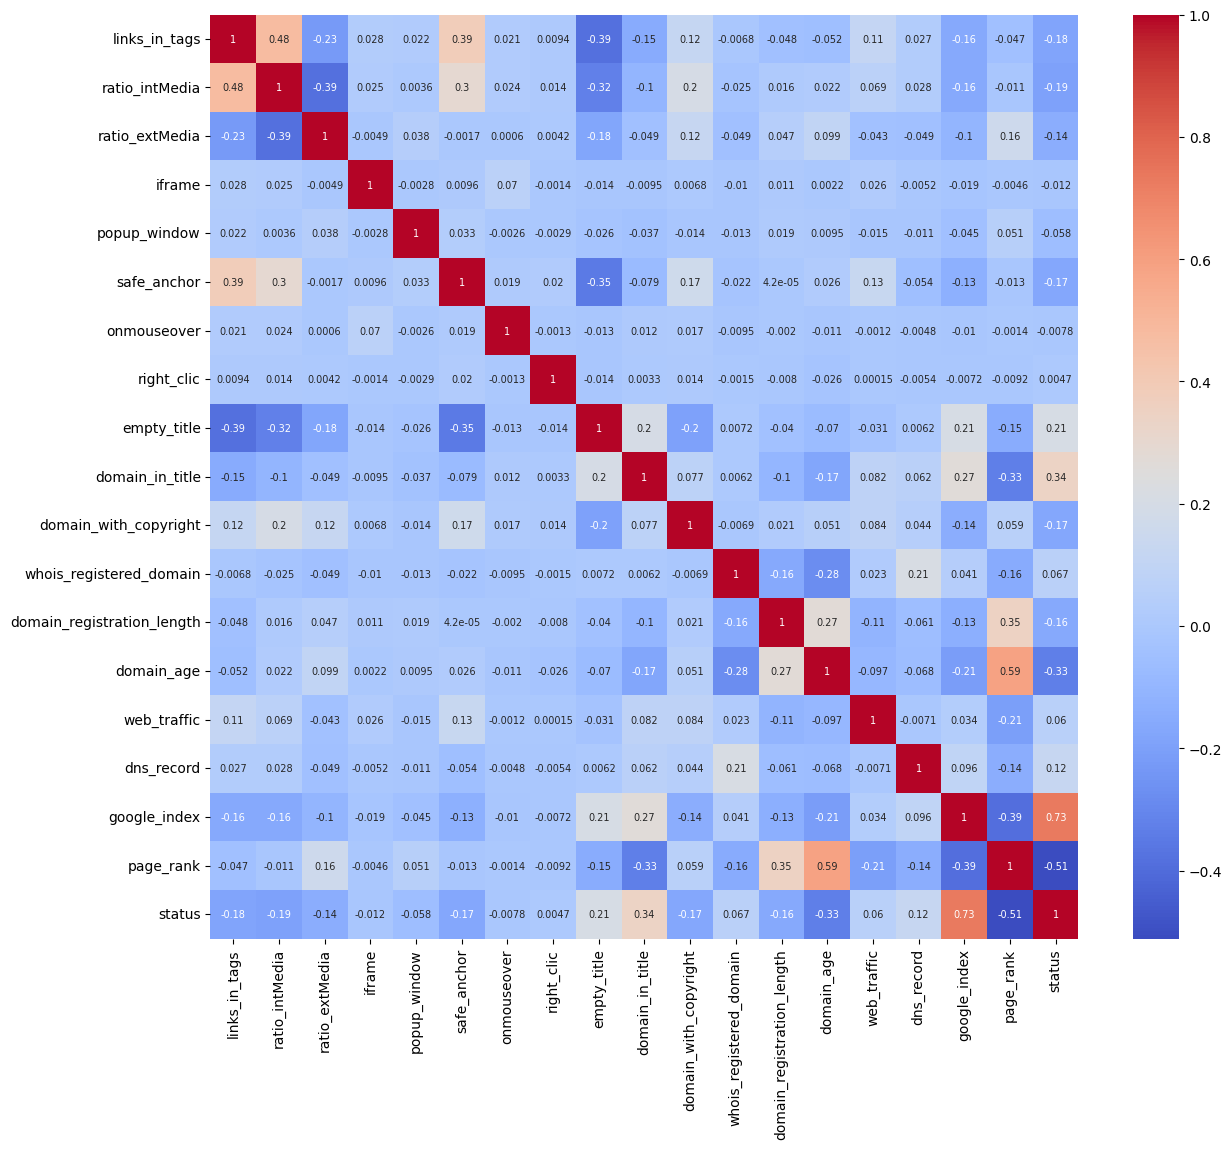

In [54]:
#replace labels with 1s and 0s
subset_df['status']=response
subset_df['status'] = subset_df['status'].replace({'phishing': 1, 'legitimate': 0})

plt.figure(figsize=(14,12))
sns.heatmap(subset_df.corr(),annot=True,annot_kws={"size": 7}, cmap='coolwarm')

Only thing to really notice is that google_index is correlated with status

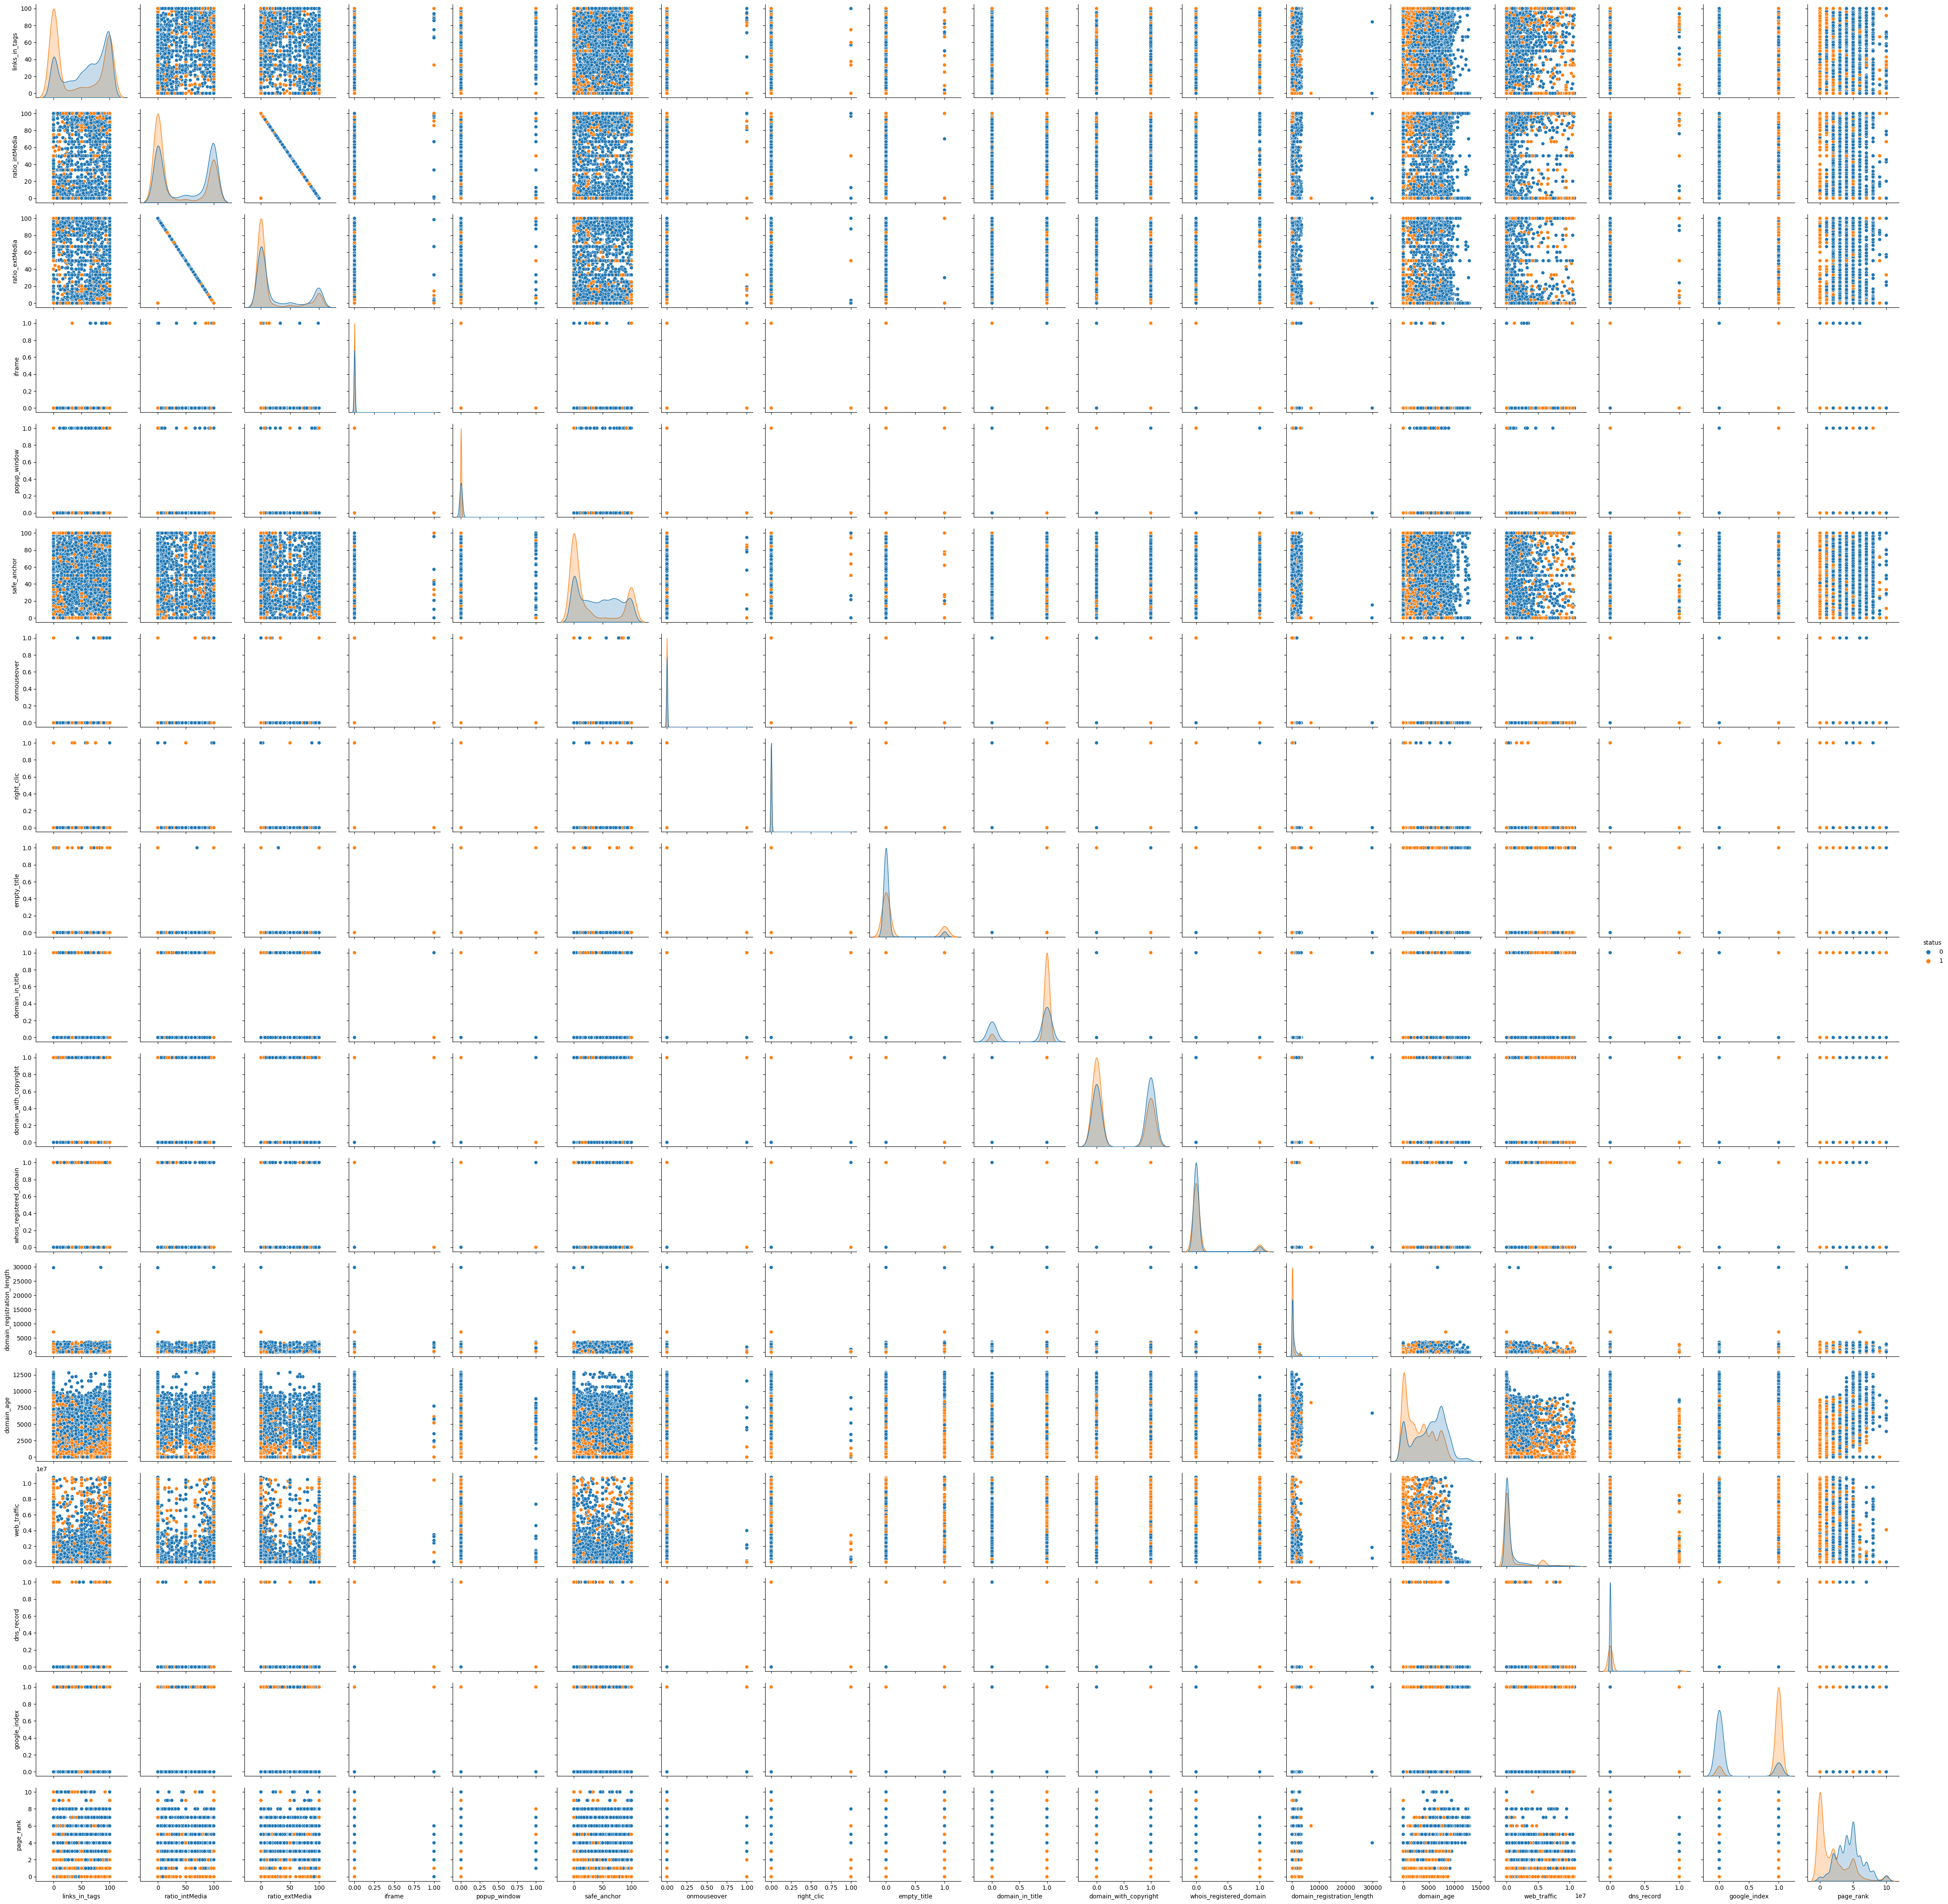

In [51]:
sns.pairplot(subset_df, hue = "status")
plt.show()

That's a stupid graph

In [56]:
subset_df['popup_window'].value_counts()

0    11361
1       69
Name: popup_window, dtype: int64